In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
avocado_info = pd.read_csv("avocado_info.csv")

In [3]:
avocado_info.head()

,Growth Duration,Fertilizer
0,98,True
1,108,False
2,129,False
3,116,False
4,111,False


In [4]:
fertilized = avocado_info.loc[avocado_info["Fertilizer"] == True, "Growth Duration"]

not_fertilized = avocado_info.loc[avocado_info["Fertilizer"] == False, "Growth Duration"]
fertilized

0        98
10      107
11      105
12      117
13      112
       ... 
1160     96
1165    152
1166     91
1167    106
1170    136
Name: Growth Duration, Length: 459, dtype: int64

In [5]:
np.random.choice(fertilized, size = len(fertilized))

array([122, 120, 126,  88, 128, 128, 129,  78, 120, 130, 116, 119, 132,
       109, 122, 121,  99, 121, 146, 115, 144, 113, 139, 124, 117, 141,
       127, 132, 123, 100,  77, 101, 120, 116, 160,  98, 125, 133,  99,
        96,  87, 112, 110, 144,  87, 113, 110, 104, 104, 124,  96, 127,
       111, 128,  72, 117, 122, 119, 113,  97, 108, 109, 119, 120, 114,
       105, 103, 107, 144,  82, 101, 116,  75, 123, 115, 121, 128, 108,
        99, 122, 134,  93, 117, 154, 129,  98, 115,  81, 116, 121, 100,
       101,  82, 109, 131, 123,  99,  95, 130, 119, 129, 115,  58,  99,
       111, 104,  93, 101, 119, 118, 117, 108, 100, 119, 132, 123,  93,
       106,  97, 141,  92, 143,  94, 130, 130, 131, 127, 117, 114, 116,
        84,  90, 145, 119, 123, 122,  86, 115,  87,  98, 113, 121, 116,
       123, 156, 126,  97, 137, 142, 141, 125, 103,  96, 119, 137, 104,
       131, 119, 127,  95, 119, 125, 127, 105, 124,  88, 115,  87, 121,
        99,  86,  85,  87, 113, 105, 160, 115, 122, 106, 133, 10

In [6]:
np.random.choice(not_fertilized, size = len(not_fertilized))

array([138, 108, 123,  55, 134, 138,  85, 138, 129, 123, 133, 134, 133,
       102, 117, 115,  85, 136, 134, 116, 115, 140, 120, 158, 152,  63,
        84, 131, 109, 110, 105, 119, 120, 114, 134, 102, 128, 120, 105,
       119,  65, 122, 102, 133, 127, 120, 115, 124, 133, 158, 163, 111,
        88, 122, 109, 117, 163, 127, 129, 117,  93, 101, 122,  80, 117,
       114, 110, 105, 127, 113, 110, 111, 146, 105, 136, 110, 145, 105,
       135, 122, 125, 155, 103, 100, 136, 130, 144, 143, 122, 137, 128,
       143, 176, 166, 137, 123, 123, 113, 136, 136, 129, 144, 126, 143,
       117, 113, 124, 151, 107, 129, 127, 137, 123, 124, 143, 129, 128,
       128, 127, 146, 100, 125, 128, 148, 115,  80, 150, 131, 128, 124,
       114, 129,  99, 137, 132, 129, 131,  93, 109, 136, 129, 124, 129,
       128,  97, 139, 119,  97, 119, 137, 126, 123, 120, 106, 129,  99,
       125, 103, 105, 145, 114, 123, 108, 144, 120, 140, 132, 111, 116,
       129, 110, 126, 124, 100, 128, 121, 127, 125, 134, 132, 12

In [7]:
def resample(orig_sample):
      return np.random.choice(orig_sample, size = len(orig_sample))

In [8]:
def bootstrap(orig_sample, reps):
    means = np.array([])
    for i in range(reps):
        new_sample = resample(orig_sample)
        new_mean = np.mean(new_sample)
        means = np. append(means, new_mean)
    return means

In [9]:
fertilized_means = bootstrap(fertilized, 10000)

not_fertilized_means = bootstrap(not_fertilized, 10000)

estimates = fertilized_means - not_fertilized_means

In [10]:
estimates

array([-10.42620169,  -7.86470741,  -7.41070128, ...,  -9.0765879 ,
        -8.23959352, -11.1431205 ])

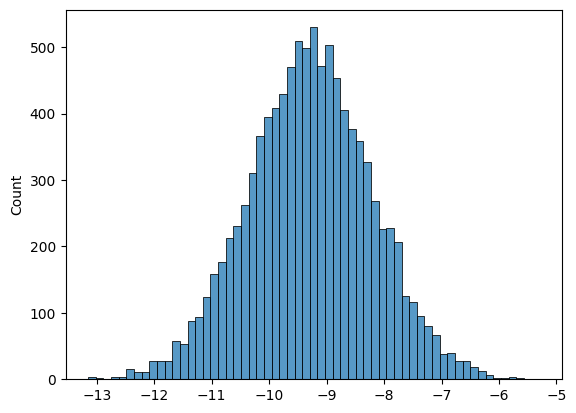

In [11]:
sns.histplot(estimates)
plt.show()

In [12]:
(np.percentile(estimates, 2.5), np.percentile(estimates, 97.5))

(np.float64(-11.40278349101878), np.float64(-7.166261940673709))